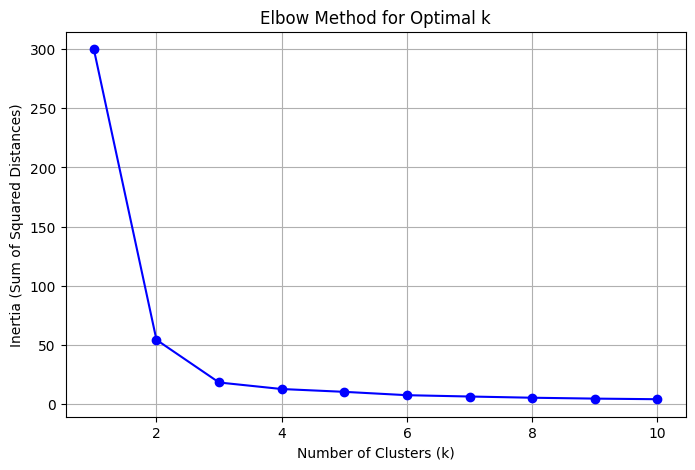

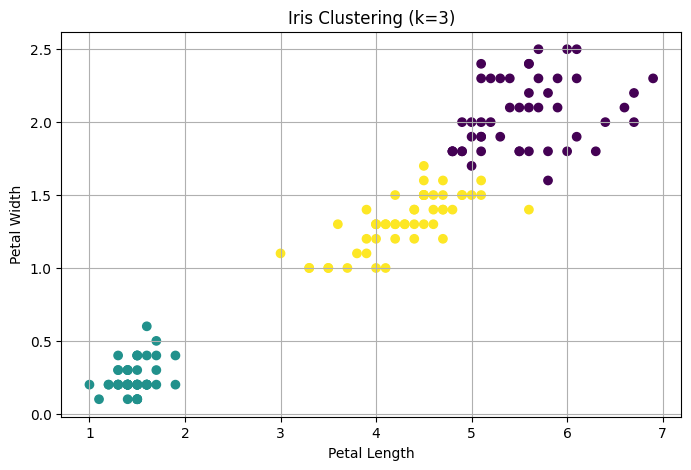

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv("iris (2).csv")

# Keep only PetalLength and PetalWidth
df = df[['petal_length', 'petal_width']]

# Check if scaling is needed
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df)

# Elbow method to determine optimal k
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Plot elbow curve
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

# Choose optimal k (e.g., from elbow plot) and fit KMeans
optimal_k = 3  # You can change this after seeing the plot
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_features)

# Plot clustered data
plt.figure(figsize=(8, 5))
plt.scatter(df['petal_length'], df['petal_width'], c=df['Cluster'], cmap='viridis')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title(f'Iris Clustering (k={optimal_k})')
plt.grid(True)
plt.show()
